In [75]:
import random

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Инициализация словаря, который будет использоваться при генерации пароля

In [76]:
lowercase_letters__ru = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
uppercase_letters_ru = 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'
digits = '0123456789'

symb_dicts = [lowercase_letters__ru, uppercase_letters_ru, digits]

symb_dicts

['абвгдеёжзийклмнопрстуфхцчшщъыьэюя',
 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ',
 '0123456789']

### Функция, генерирующая пароль

In [77]:
def generate_password(length: int) -> str:
    if length <= 0:
        return ''

    res = list()
    global symb_dicts
    
    symb_dict = ''.join(symb_dicts)
    res = [random.choice(symb_dict) for _ in range(length)]

    return ''.join(res)

In [78]:
def generate_fix_password(length: int) -> str:
    if length <= 0:
        return ''

    res = list()
    global symb_dicts
    
    dicts_num = len(symb_dicts)
    std_size = length // dicts_num
    ex_size = length % dicts_num

    for symb_dict in symb_dicts:
        res.append(''.join([random.choice(symb_dict) for _ in range(std_size)]))
        
    for i in range(ex_size):
        res.append(random.choice(random.choice(symb_dicts)))
    
    res = list(''.join(res))
    random.shuffle(res)
    res = ''.join(res)
    
    return res

In [107]:
print('Password: ', generate_password(40))
print('Fixed password: ', generate_fix_password(40))

Password:  ТпИсЖяРт02с6ЙТю9Ыэ2ьтЧ8уУ5Фпзр9ЫГьээ7АцА
Fixed password:  6б1Лп8ЪШЛИТСБщ9ёсЬ3съ9б6Юз8мА240жэ10Хб5С


In [80]:
def count_dist(password: str) -> list[int]:
    global symb_dicts
    res = list()
    password_count = Counter(password)
    for symb_dict in symb_dicts:
        s = 0
        for symb in symb_dict:
            s += password_count.get(symb, 0)
        res.append(s) 
        
    return res           
    
count_dist(generate_password(30))

[6, 17, 7]

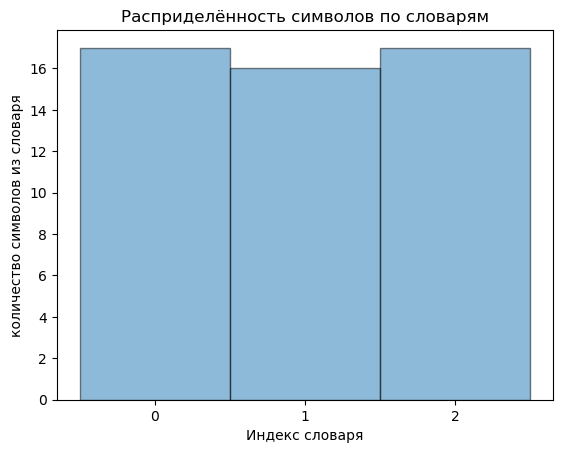

In [108]:
password = generate_password(20)
fix_password = generate_fix_password(50)
x_values =  list(range(len(symb_dicts)))
y_values = count_dist(fix_password)

bars = plt.bar(x_values, y_values, edgecolor='black', alpha=0.5, width=1) 



plt.title('Расприделённость символов по словарям')
plt.xlabel('Индекс словаря')
plt.ylabel('количество символов из словаря')

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xticks(x_values)


plt.show()

('Ф', 'в', 'З', 'о', 'И', 'б', 'н', 'Ц', '8', '3', 'у', 'ц', 'М', '1', 'Х', 'Ё', 'Д', 'Ш', 'Ь') 
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2)


([<matplotlib.axis.XTick at 0x73f1f45dddf0>,
 [Text(0.0, 0, 'Ф'),
  Text(1.0, 0, 'в'),
  Text(2.0, 0, 'З'),
  Text(3.0, 0, 'о'),
  Text(4.0, 0, 'И'),
  Text(5.0, 0, 'б'),
  Text(6.0, 0, 'н'),
  Text(7.0, 0, 'Ц'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '3'),
  Text(10.0, 0, 'у'),
  Text(11.0, 0, 'ц'),
  Text(12.0, 0, 'М'),
  Text(13.0, 0, '1'),
  Text(14.0, 0, 'Х'),
  Text(15.0, 0, 'Ё'),
  Text(16.0, 0, 'Д'),
  Text(17.0, 0, 'Ш'),
  Text(18.0, 0, 'Ь')])

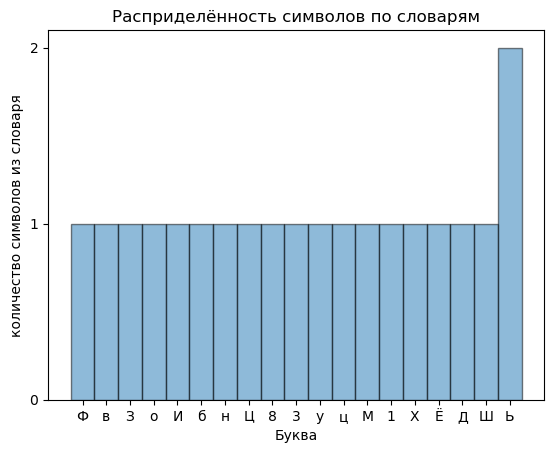

In [109]:
pass_count = Counter(password)
labels, values = zip(*pass_count.items())
print(labels, '\n', values)

bars = plt.bar(labels, values, edgecolor='black', alpha=0.5, width=1) 

plt.title('Расприделённость символов по словарям')
plt.xlabel('Буква')
plt.ylabel('количество символов из словаря')

plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(labels)

In [83]:
def count_iteretions_num(length: int):
    global symb_dicts
    dict_size = len(''.join(symb_dicts))
    return dict_size ** length

In [84]:
size = 10
x = [i for i in range(1, 51)]
y = [count_iteretions_num(i) for i in x]

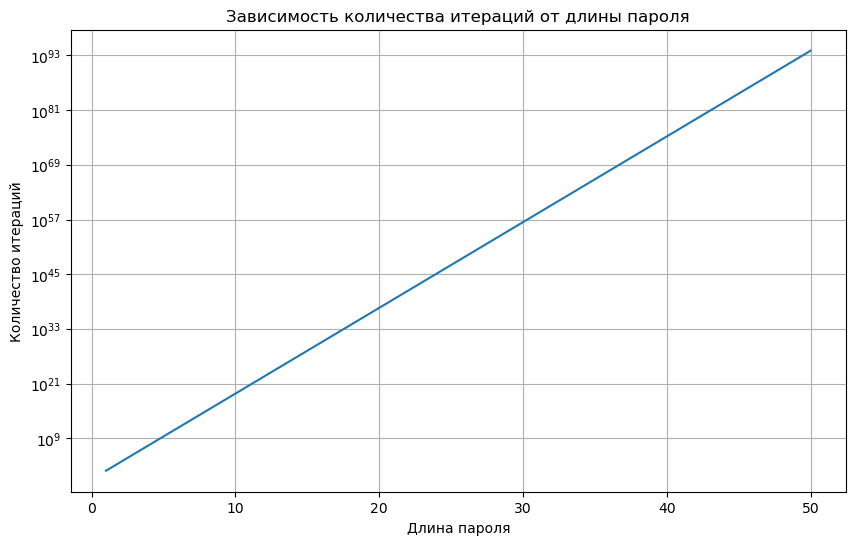

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)

plt.title('Зависимость количества итераций от длины пароля')
plt.xlabel('Длина пароля')
plt.ylabel('Количество итераций')

plt.yscale('log')

plt.grid(True)
plt.show()